In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.metrics import accuracy_score
np.random.seed(1)

In [3]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [4]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [5]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
print(permutation)
X = X[permutation]
y = y[permutation]

[10840 56267 14849 ... 42613 43567 68268]


In [6]:
cnt=5
sampleX = X[0:cnt]
sampley = y[0:cnt]
exampleX = sampleX.reshape(sampleX.shape[0],28,28)
print(exampleX.shape)

(5, 28, 28)


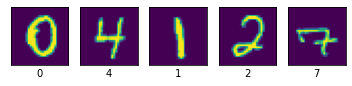

In [7]:
for i in range(exampleX.shape[0]):
    subplt = plt.subplot(1, exampleX.shape[0], i + 1)
    subplt.imshow(exampleX[i,:,:])  
    subplt.set_xticks(())
    subplt.set_yticks(())
    subplt.set_xlabel(y[i])
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
clf = LogisticRegression(
    C=50. / X_train.shape[0], penalty='l1', solver='saga', tol=0.1
)
clf.fit(X_train, y_train)

LogisticRegression(C=0.0008928571428571428, penalty='l1', solver='saga',
                   tol=0.1)

In [11]:
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 84.69%
Test score with L1 penalty: 0.8401


Text(0.5, 0.98, 'Classification vector for...')

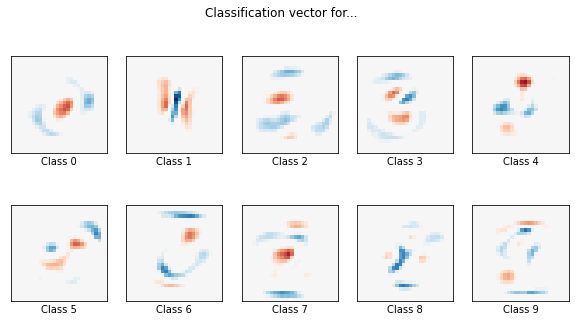

In [12]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

In [13]:
# Training score
y_pred_tuned = clf.predict(X_train)
accuracy_score(y_train, y_pred_tuned)

0.83975

In [14]:
# Test score
y_pred_tuned = clf.predict(X_test)
accuracy_score(y_test, y_pred_tuned)

0.8401428571428572

In [15]:
A = X_test[0,:]
predictions = clf.predict_proba(A.reshape(1, -1))
y_pred_tuned = clf.predict(A.reshape(1, -1))
print(predictions)
print(y_pred_tuned)
print(y_test[0])

[[0.02264426 0.01901333 0.01528826 0.01933849 0.67505329 0.0454021
  0.01927373 0.04245956 0.02942765 0.11209933]]
['4']
4


In [16]:
A=np.ones((1,784))
predictions = clf.predict_proba(A)
print(predictions)

[[0.04683246 0.01522985 0.15330595 0.07667659 0.03879292 0.04518991
  0.14765318 0.04012704 0.35007937 0.08611272]]


In [22]:
from joblib import dump, load

dump(clf, "logres.m5")

['logres.m5']

In [26]:
# Load from file
joblib_model = load("logres.m5")

# Calculate the accuracy and predictions
score = joblib_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))

Test score: 84.01 %
